In [31]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier

## Задача 1:

Цель задания: Исследовать применение алгоритма K-ближайших соседей (KNN) для задачи классификации видов ирисов. Оптимизировать количество соседей с целью повышения качества классификации, измеряемого взвешенным F1-счетом.

Задачи:
Загрузка и предварительная обработка данных

Используйте функцию load_iris из sklearn.datasets для загрузки датасета.
Разделите данные на признаки и целевую переменную.
Разделите набор данных на обучающую и тестовую выборки с пропорцией 70% на 30%.


In [3]:
# грузим данные
data = load_iris()
# составные данные
features = data['data']
targets = data['target']
cols = data['feature_names']
# создаем датасет
dataset = pd.DataFrame(features, columns=cols)
dataset['target'] = targets
# делаем на признаки и таргет
x = dataset.drop(columns=['target'])
y = dataset['target']
# поделим на тренировочную и тестовую выборки
x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size=0.3, random_state=105)

In [24]:
#Масштабирование признаков
scaler = MinMaxScaler()
x_tr_scaled_data = scaler.fit_transform(x_tr)
x_tr_scaled = pd.DataFrame(x_tr_scaled_data, columns=x_tr.columns)

x_t_scaled_data = scaler.transform(x_t)
x_t_scaled = pd.DataFrame(x_t_scaled_data, columns=x_t.columns)

In [7]:
#Обучение модели KNN и её оценка
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_tr_scaled, y_tr)

KNeighborsClassifier()

In [8]:
prediction = knn_classifier.predict(x_t_scaled)
print(classification_report(y_t, prediction))
print(confusion_matrix(y_t, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 15  1]
 [ 0  0 17]]


In [25]:
#Оптимизация гиперпараметров с использованием GridSearchCV
params = {'n_neighbors': range(2, 21)}
knn_classifier2 = KNeighborsClassifier()
knn_search_classifier = GridSearchCV(estimator=knn_classifier2, param_grid=params, scoring='f1_weighted', cv=3)
knn_search_classifier.fit(x_tr_scaled, y_tr)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 21)}, scoring='f1_weighted')

In [19]:
knn_search_classifier.best_params_

{'n_neighbors': 12}

In [20]:
prediction = knn_search_classifier.predict(x_t_scaled)
print(classification_report(y_t, prediction))
print(confusion_matrix(y_t, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[12  0  0]
 [ 0 16  0]
 [ 0  0 17]]


In [26]:
#Анализ влияния количества соседей на качество классификации
f1_score(y_t, prediction, average='weighted')

1.0

In [27]:
scores = []
for i in range(2, 21):
    temp_knn = KNeighborsClassifier(n_neighbors=i)
    temp_knn.fit(x_tr_scaled, y_tr)
    temp_prediction = temp_knn.predict(x_t_scaled)
    temp_f1 = f1_score(y_t, temp_prediction, average='weighted')
    scores.append(temp_f1)

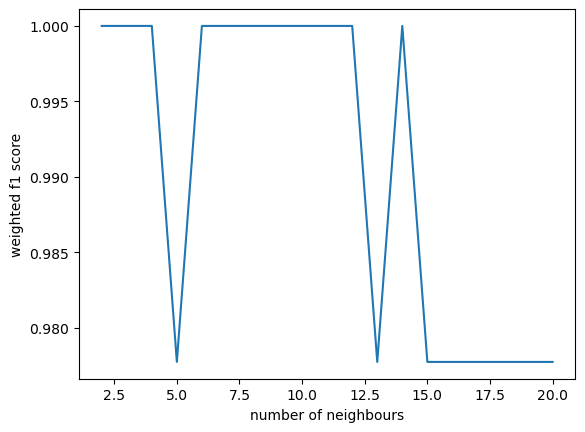

In [28]:
plt.plot(range(2, 21), scores)
plt.xlabel('number of neighbours')
plt.ylabel('weighted f1 score')
plt.show()

## Задача 2:

Цель задания: Использовать алгоритм K-ближайших соседей (KNN) для прогнозирования средней стоимости домовладений в различных блоках Калифорнии. Оптимизировать количество соседей для достижения минимальной ошибки предсказания, измеряемой среднеквадратичной ошибкой (RMSE).

Задачи:

Загрузка и предварительная обработка данных

Используйте функцию fetch_california_housing из sklearn.datasets для загрузки датасета.
Преобразуйте полученные данные в pandas DataFrame, добавьте названия столбцов и целевую переменную.
Разделите данные на набор признаков (X) и целевую переменную (y).

In [32]:
# грузим данные
data = fetch_california_housing()

# составные данные
features = data['data']
targets = data['target']
cols = data['feature_names']

# создаем датасет
dataset = pd.DataFrame(features, columns=cols)
dataset['target'] = targets

# делаем на признаки и таргет
x = dataset.drop(columns=['target'])
y = dataset['target']

# поделим на тренировочную и тестовую выборки
x_tr, x_t, y_tr, y_t = train_test_split(x, y, test_size=0.3, random_state=105)

In [33]:
#Масштабирование признаков
scaler = MinMaxScaler()
x_tr_scaled_data = scaler.fit_transform(x_tr)
x_tr_scaled = pd.DataFrame(x_tr_scaled_data, columns=x_tr.columns)

x_t_scaled_data = scaler.transform(x_t)
x_t_scaled = pd.DataFrame(x_t_scaled_data, columns=x_t.columns)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE

In [36]:
#Обучение модели и оценка результатов
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_tr_scaled, y_tr)

KNeighborsRegressor()

In [37]:
prediction = knn_regressor.predict(x_t_scaled)
MSE(y_t, prediction) ** (0.5)

0.6290784455030349

In [39]:
scores = []
for i in range(2, 20):
    temp_knn = KNeighborsRegressor(n_neighbors=i)
    temp_knn.fit(x_tr_scaled, y_tr)
    temp_prediction = temp_knn.predict(x_t_scaled)
    temp_rmse = MSE(y_t, temp_prediction) ** (0.5)
    scores.append(temp_rmse)

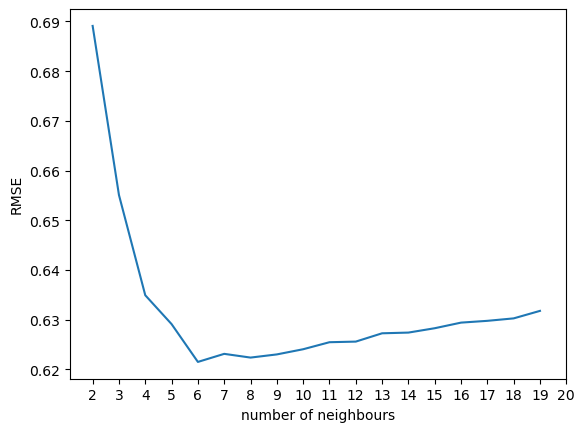

In [40]:
plt.plot(range(2, 20), scores)
plt.xlabel('number of neighbours')
plt.ylabel('RMSE')
plt.xticks(range(2, 21))
plt.show()

### Влияние количества соседей на RMSE: 
Увеличение количества соседей часто приводит к уменьшению RMSE. Это происходит потому, что при увеличении числа соседей модель становится менее склонной к переобучению и лучше обобщает данные.
Для данной задачи оптимальное количество соседей будет тем, которое дает наименьшее значение RMSE на тестовой выборке

## Задача 3:

Цель: Исследовать влияние количества кластеров на качество кластеризации искусственного набора данных с использованием меры AMI (Adjusted Mutual Information).



Шаги:

Генерация данных: Сгенерировать набор данных, содержащий 1200 точек с 2 признаками и разделенный на 7 кластеров с помощью функции make_blobs.
KMeans кластеризация: Применить алгоритм KMeans к сгенерированным данным с разным количеством кластеров (от 2 до 10). Оценить качество кластеризации для каждого варианта с помощью меры AMI.
Визуализация результатов: Построить график, на котором по оси X отображено количество кластеров, а по оси Y - соответствующие значения AMI. Это позволит определить оптимальное количество кластеров для данного набора данных.

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score

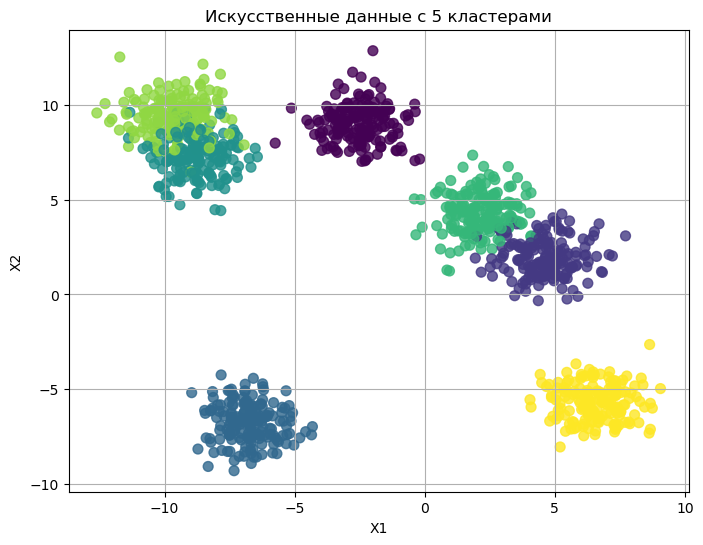

In [48]:
from sklearn.datasets import make_blobs

# Генерируем синтетические данные с 2 признаками и 7 кластерами
X, y = make_blobs(n_samples=1200, centers=7, n_features=2, random_state=42)

# Нарисуем датасет
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title('Искусственные данные с 5 кластерами')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [50]:
cluster_range = range(2, 11)
ami_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    ami = adjusted_mutual_info_score(y, cluster_labels)
    ami_scores.append(ami)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

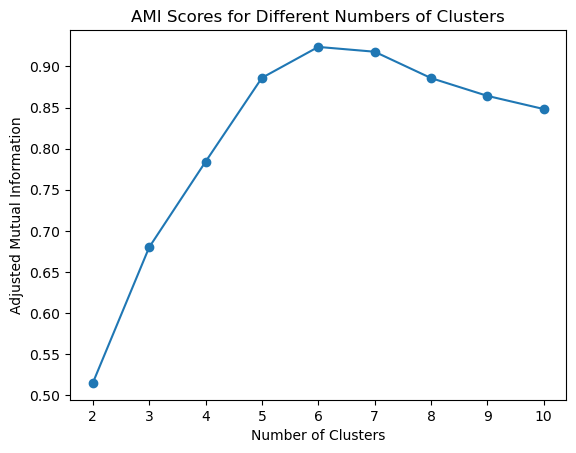

In [51]:
# Шаг 3: Визуализация результатов
plt.plot(cluster_range, ami_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Mutual Information')
plt.title('AMI Scores for Different Numbers of Clusters')
plt.show()